In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
#Cargamos los datos con los que hemos estado trabajando

datos = np.load('fit_exercise.npy')

In [5]:
#Definimos las funciones necesarias para el algoritmo

def recta(x, a, b):
    return a*x + b

def likelihood(valores, a, b):
    x = valores[0]
    y = valores[1]
    err = valores[2]
    modelo = recta(x, a, b)
    lh = - 0.5*np.sum(((y - modelo)**2)/((err)**2))
    return lh

def prior_a(a):
    c = -10
    d = 10
    W = d - c
    if a >= c and a <= d:
        p_a = 1/W
    else:
        p_a = 0
    return p_a

def prior_b(b):
    c = -10
    d = 10
    W = d - c
    if b >= c and b <= d:
        p_b = 1/W
    else:
        p_b = 0
    return p_b

-1.1582848196641944
5.360995736288826


Text(0, 0.5, 'b')

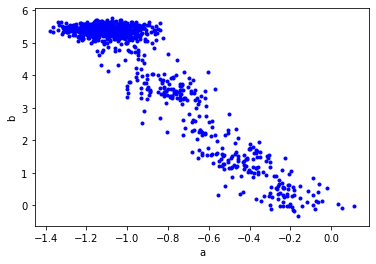

In [57]:
#Definimos entonces el posterior (logarítmico) para nuestros datos en fit_exercise.npy

a = 0
b = 0
posterior = likelihood(datos, a, b) + np.log(prior_a(a)) + np.log(prior_b(b))

a_lista = []
b_lista = []

for i in range(1000):
    a_new = np.random.normal(a, 0.1)
    b_new = np.random.normal(b, 0.1)
    posterior_new = likelihood(datos, a_new, b_new) + np.log(prior_a(a_new)) + np.log(prior_b(b_new))
    if posterior_new > posterior:
        a_lista.append(a_new)
        b_lista.append(b_new)
        a = a_new
        b = b_new
        posterior = posterior_new
    else:
        random = np.random.random()
        if posterior_new - posterior > random:
            a_lista.append(a_new)
            b_lista.append(b_new)
            a = a_new
            b = b_new
            posterior = posterior_new
        else:
            a_lista.append(a_new)
            b_lista.append(b_new)
            
print(a_new)
print(b_new)
plt.plot(a_lista, b_lista, '.', color = 'blue')
plt.xlabel('a')
plt.ylabel('b')

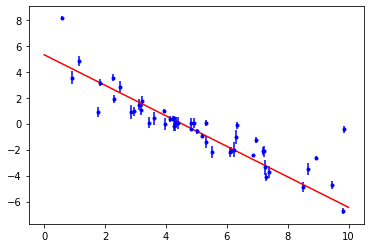

<Figure size 3600x2160 with 0 Axes>

In [40]:
x = np.linspace(0, 10, 100)
plt.plot(x, a_new*x + b_new, color = 'red')
plt.errorbar(datos[0], datos[1], datos[2], None, color = 'blue', fmt = '.')
plt.figure(figsize=(50,30))
plt.show()